# Formaterer Dataen som i Del 1

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from funksjoner import Del1, Del2


filnavn = '../data/table.csv'
del1 = Del1(filnavn)
data = del1.load_data()
data = del1.clean_data()


# Dataanalyse

In [3]:
del2 = Del2(data)
kolonner = ["Tid(norsk normaltid)", "Høyeste vindkast (1 t)", "Lufttemperatur"]

# Printe ut statistiske verdier for vindkast
print("Gjennomsnittlig vindkast:", del2.compute_mean("Høyeste vindkast (1 t)"))
print("Median vindkast:", del2.compute_median("Høyeste vindkast (1 t)"))
print("Standardavvik vindkast:", del2.compute_stdv("Høyeste vindkast (1 t)"), '\n')
print("Enkel analyse av vindkast:", del2.simple_analysis("Høyeste vindkast (1 t)"), '\n', '\n')

# Printe ut statistiske verdier for temperatur
print("Gjennomsnittlig temperatur:", del2.compute_mean("Lufttemperatur"))
print("Median temperatur:", del2.compute_median("Lufttemperatur"))
print("Standardavvik temperatur:", del2.compute_stdv("Lufttemperatur"), '\n')
print("Enkel analyse av temperatur:", del2.simple_analysis("Lufttemperatur"))


Gjennomsnitt for 'Høyeste vindkast (1 t)': 11.29
Gjennomsnittlig vindkast: 11.288067665758401
Median for 'Høyeste vindkast (1 t)': 10.50
Median vindkast: 10.5
Varians for 'Høyeste vindkast (1 t)': 5.78
Standardavvik vindkast: 5.776701283915553 

count    8808.000000
mean       11.288068
std         5.776701
min         0.900000
25%         7.100000
50%        10.500000
75%        14.400000
max        39.200000
Name: Høyeste vindkast (1 t), dtype: float64
Enkel analyse av vindkast: None 
 

Gjennomsnitt for 'Lufttemperatur': 3.79
Gjennomsnittlig temperatur: 3.7922116257947325
Median for 'Lufttemperatur': 3.00
Median temperatur: 3.0
Varians for 'Lufttemperatur': 7.03
Standardavvik temperatur: 7.034264189153865 

count    8808.000000
mean        3.792212
std         7.034264
min       -15.700000
25%        -1.200000
50%         3.000000
75%         8.100000
max        28.800000
Name: Lufttemperatur, dtype: float64
Enkel analyse av temperatur: None


# Visualisering

Først vanlig visualisering av dataene

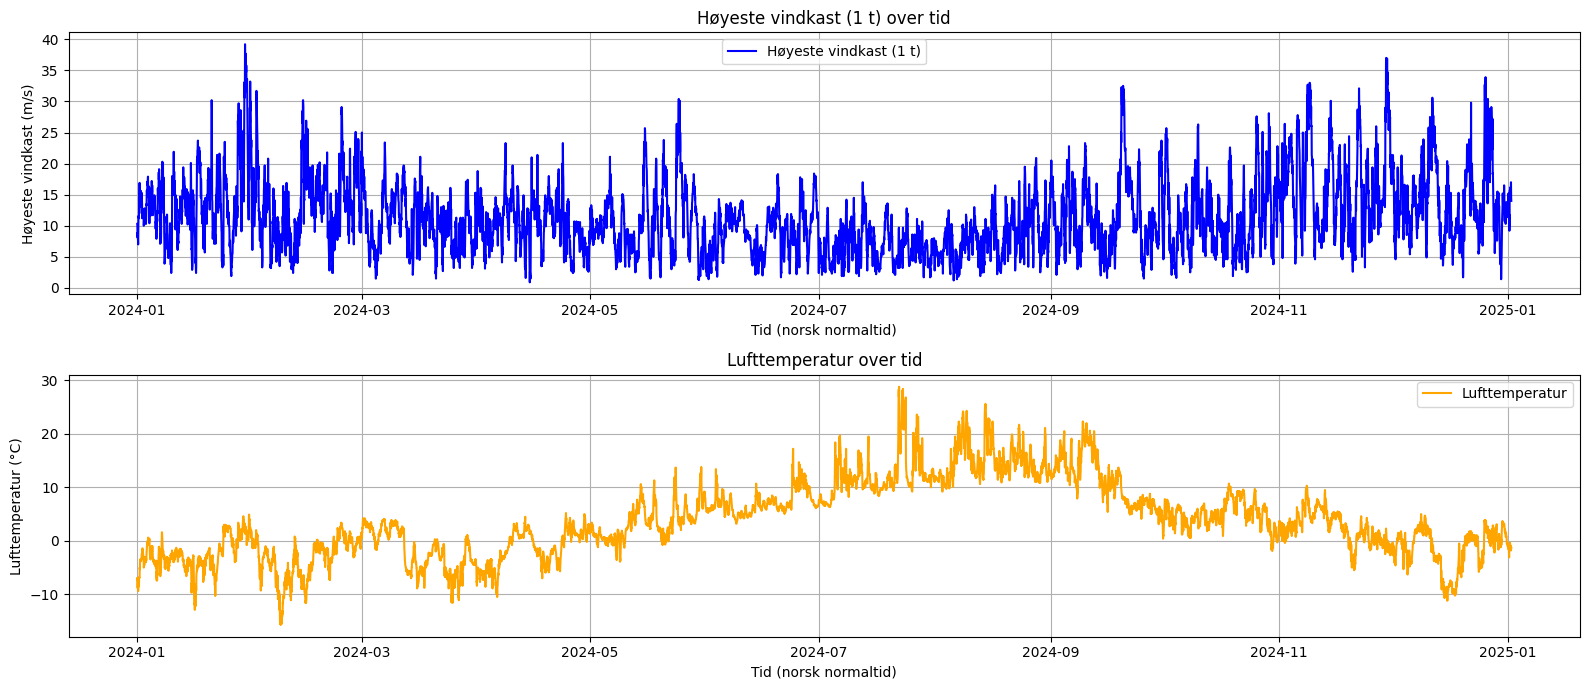

In [4]:
#Plotting "Høyeste vindkast (1 t)" og "Lufttemperatur" over tid
plt.figure(figsize=(16, 7))

#Plot for "Høyeste vindkast (1 t)"
plt.subplot(2, 1, 1)
plt.plot(data["Tid(norsk normaltid)"], data["Høyeste vindkast (1 t)"], label="Høyeste vindkast (1 t)", color="blue")
plt.title("Høyeste vindkast (1 t) over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Høyeste vindkast (m/s)")
plt.grid(True)
plt.legend()

# Plot for "Lufttemperatur"
plt.subplot(2, 1, 2)
plt.plot(data["Tid(norsk normaltid)"], data["Lufttemperatur"], label="Lufttemperatur", color="orange")
plt.title("Lufttemperatur over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Lufttemperatur (°C)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Moving Average

Tar i bruk moving average for å håndtere manglende data og glatte ut kurvene

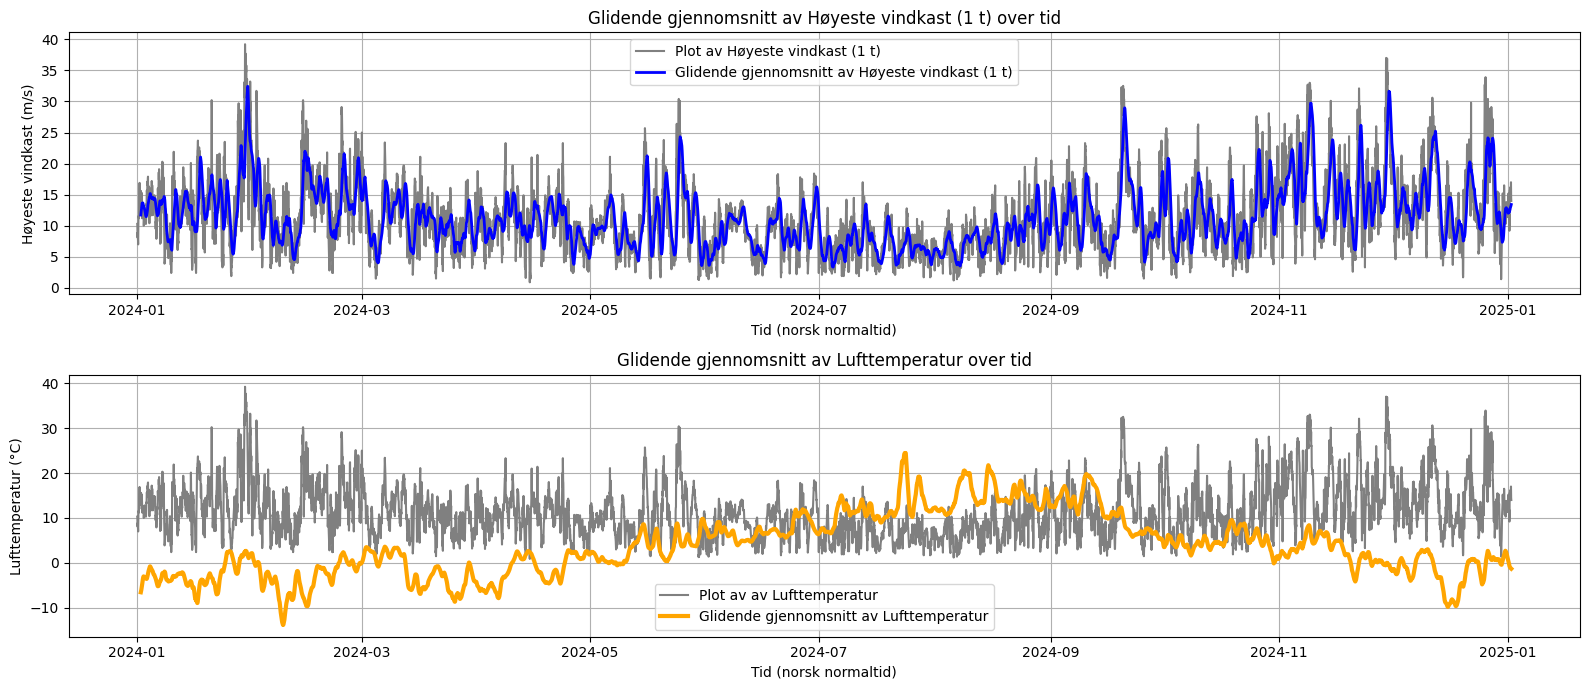

In [15]:
window_size = 24

mv_vind = del2.moving_average("Høyeste vindkast (1 t)", window_size)
mv_temp = del2.moving_average("Lufttemperatur", window_size)

# Plotting glidende gjennomsnitt
plt.figure(figsize=(16, 7))
plt.subplot(2, 1, 1)
plt.plot(data["Tid(norsk normaltid)"], data["Høyeste vindkast (1 t)"], label="Plot av Høyeste vindkast (1 t)", color="grey")
plt.plot(data["Tid(norsk normaltid)"], mv_vind, label="Glidende gjennomsnitt av Høyeste vindkast (1 t)", color="blue", linewidth=2)
plt.title("Glidende gjennomsnitt av Høyeste vindkast (1 t) over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Høyeste vindkast (m/s)")
plt.grid(True)
plt.legend()

# Plotting glidende gjennomsnitt for lufttemperatur 
plt.subplot(2, 1, 2)
plt.plot(data["Tid(norsk normaltid)"], data["Høyeste vindkast (1 t)"], label="Plot av av Lufttemperatur", color="grey")
plt.plot(data["Tid(norsk normaltid)"], mv_temp, label="Glidende gjennomsnitt av Lufttemperatur", color="orange", linewidth=3)
plt.title("Glidende gjennomsnitt av Lufttemperatur over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Lufttemperatur (°C)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Boxplot med bruk av seaborn

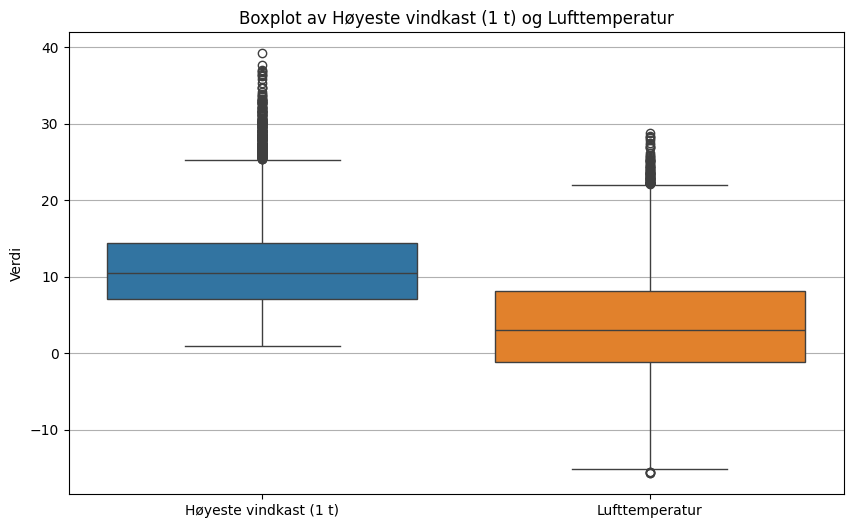

In [6]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[["Høyeste vindkast (1 t)", "Lufttemperatur"]])
plt.title("Boxplot av Høyeste vindkast (1 t) og Lufttemperatur")
plt.ylabel("Verdi")
plt.grid(axis="y")
plt.show()

### Interaktiv modell



In [7]:
import plotly.graph_objects as go

fig_vind = go.Figure()

# Legg til dataserien
fig_vind.add_trace(go.Scatter(
    x=data["Tid(norsk normaltid)"],
    y=data["Høyeste vindkast (1 t)"],
    mode='lines',
    name='Høyeste vindkast (1 t)',
    line=dict(color='blue')
))

# Oppdater layout med range-slider
fig_vind.update_layout(
    title='Høyeste vindkast (1 t) over tid',
    xaxis_title='Tid (norsk normaltid)',
    yaxis_title='Høyeste vindkast (m/s)',
    xaxis=dict(rangeslider=dict(visible=True)),
    template="plotly_white"
)

# Lagre i undermappe
mappenavn = "../src/plot_html"
if not os.path.exists(mappenavn):
    os.makedirs(mappenavn, exist_ok=True)

filename_vind = "plotly_vindkast.html"
html_path_vind = os.path.join(mappenavn, filename_vind)

# Vis figuren
fig_vind.write_html(html_path_vind)

fig_temp = go.Figure()
# Legg til dataserien
fig_temp.add_trace(go.Scatter(
    x=data["Tid(norsk normaltid)"],
    y=data["Lufttemperatur"],
    mode='lines',
    name='Lufttemperatur',
    line=dict(color='orange')
))
# Oppdater layout med range-slider
fig_temp.update_layout(
    title='Lufttemperatur over tid',
    xaxis_title='Tid (norsk normaltid)',
    yaxis_title='Lufttemperatur (°C)',
    xaxis=dict(rangeslider=dict(visible=True)),
    template="plotly_white"
)

filename_temp = "plotly_lufttemp.html"
html_path_temp = os.path.join(mappenavn, filename_temp)

# Vis figuren
fig_temp.write_html(html_path_temp)

### Kjør for å åpne den interaktive modellen

In [8]:
import webbrowser
# Åpne HTML-filene i nettleseren
#webbrowser.open(html_path_vind)
#webbrowser.open(html_path_temp)

# Prediktiv Analyse

In [9]:
# Trener lineær regresjon for vindkast og temperatur
reg_vind, start_tid_vind = del2.train_linear_regression("Høyeste vindkast (1 t)")
reg_temp, start_tid_temp = del2.train_linear_regression("Lufttemperatur")

# Printer Parametrene
print("Vindmodell:", reg_vind.intercept_, reg_vind.coef_)
print("Temperaturmodell:", reg_temp.intercept_, reg_temp.coef_) 


Vindmodell: 10.532077032108088 [0.00017168]
Temperaturmodell: -0.62684664010437 [0.00100353]


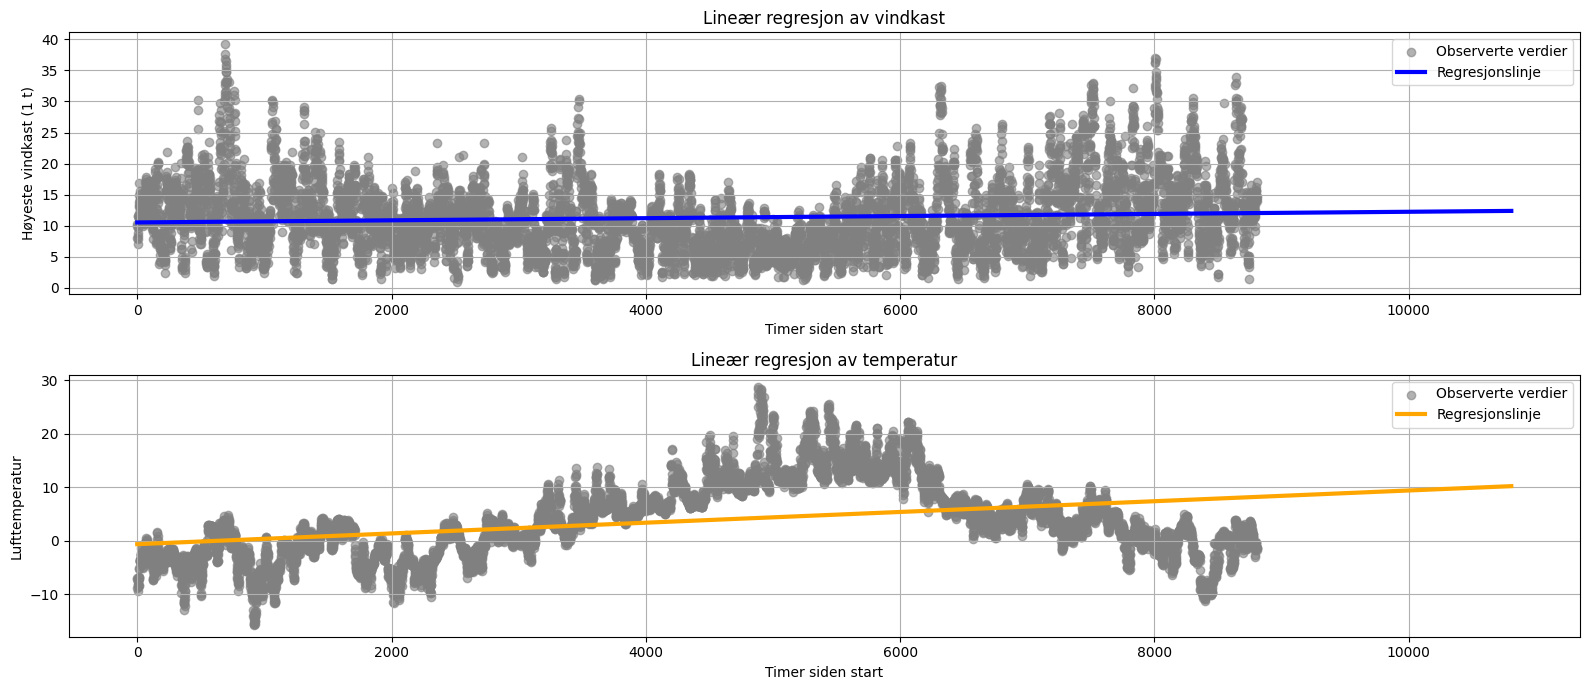

In [10]:
x = del2.data["medgått_tid"]
y = [del2.data["Høyeste vindkast (1 t)"], del2.data["Lufttemperatur"]]

# Predikering av verdier utover dataene
x_extended = np.linspace(x.min(), x.max() + 2000, 1000)
y_predicted_vind = del2.predict(reg_vind, x_extended)
y_predicted_temp = del2.predict(reg_temp, x_extended)

#Plotting "Høyeste vindkast (1 t)" og "Lufttemperatur" over tid
plt.figure(figsize=(16, 7))

#Plot for "Høyeste vindkast (1 t)"
plt.subplot(2, 1, 1)
plt.scatter(x, y[0], label="Observerte verdier", alpha= 0.6, color="grey")
plt.plot(x_extended, y_predicted_vind, color="blue", label="Regresjonslinje", linewidth=3)
plt.title("Lineær regresjon av vindkast")
plt.xlabel("Timer siden start")
plt.ylabel("Høyeste vindkast (1 t)")
plt.legend()
plt.grid(True)

# Plot for "Lufttemperatur"
plt.subplot(2, 1, 2)
plt.scatter(x, y[1], label="Observerte verdier", alpha=0.6, color="grey")
plt.plot(x_extended, y_predicted_temp, color="orange", label="Regresjonslinje", linewidth=3)
plt.title("Lineær regresjon av temperatur")
plt.xlabel("Timer siden start")
plt.ylabel("Lufttemperatur")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

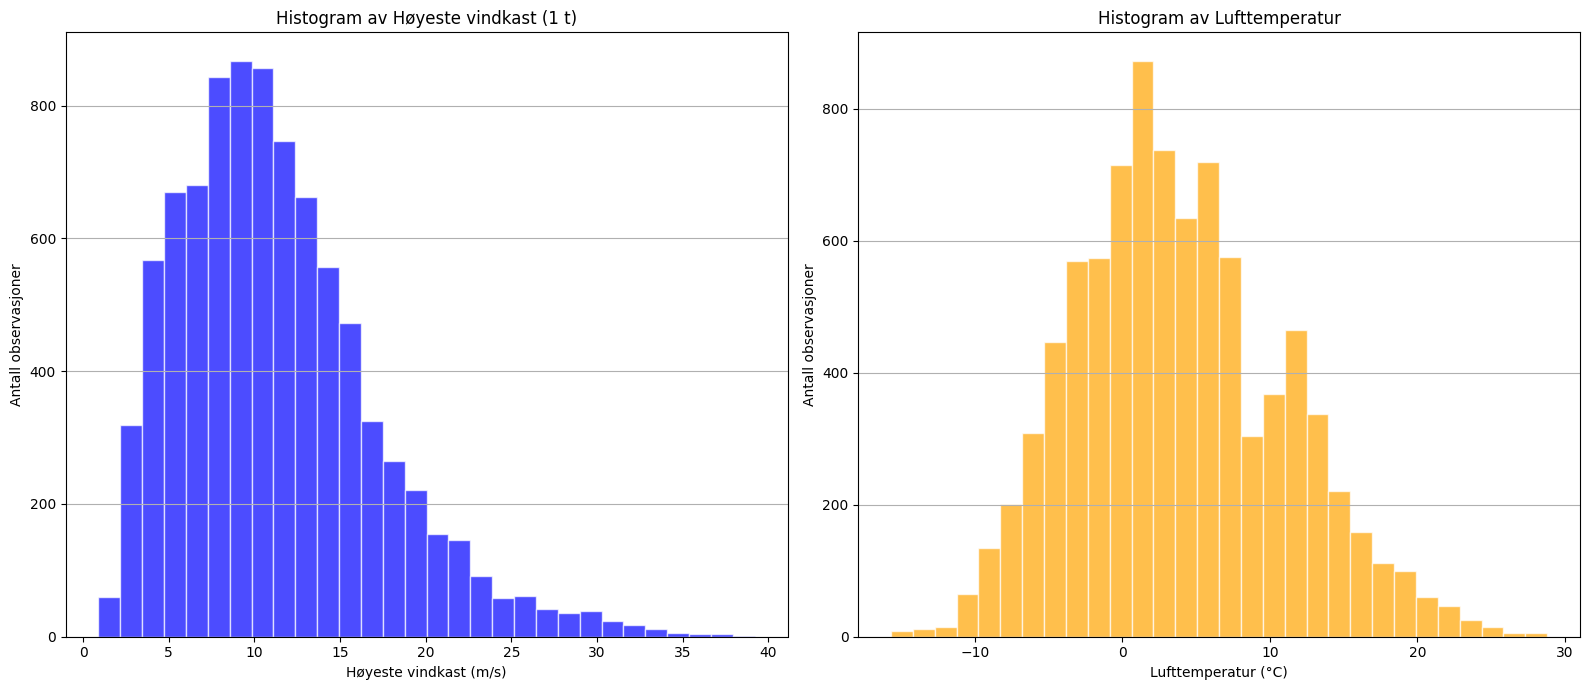

In [11]:
vind = del2.data["Høyeste vindkast (1 t)"]
temp = del2.data["Lufttemperatur"]

# Plotting av histogranmene
plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.hist(vind, bins=30, color="blue", alpha=0.7, edgecolor="white")
plt.title("Histogram av Høyeste vindkast (1 t)")
plt.xlabel("Høyeste vindkast (m/s)")
plt.ylabel("Antall observasjoner")
plt.grid(axis="y")
plt.subplot(1, 2, 2)
plt.hist(temp, bins=30, color="orange", alpha=0.7, edgecolor="white")
plt.title("Histogram av Lufttemperatur")
plt.xlabel("Lufttemperatur (°C)")
plt.ylabel("Antall observasjoner")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


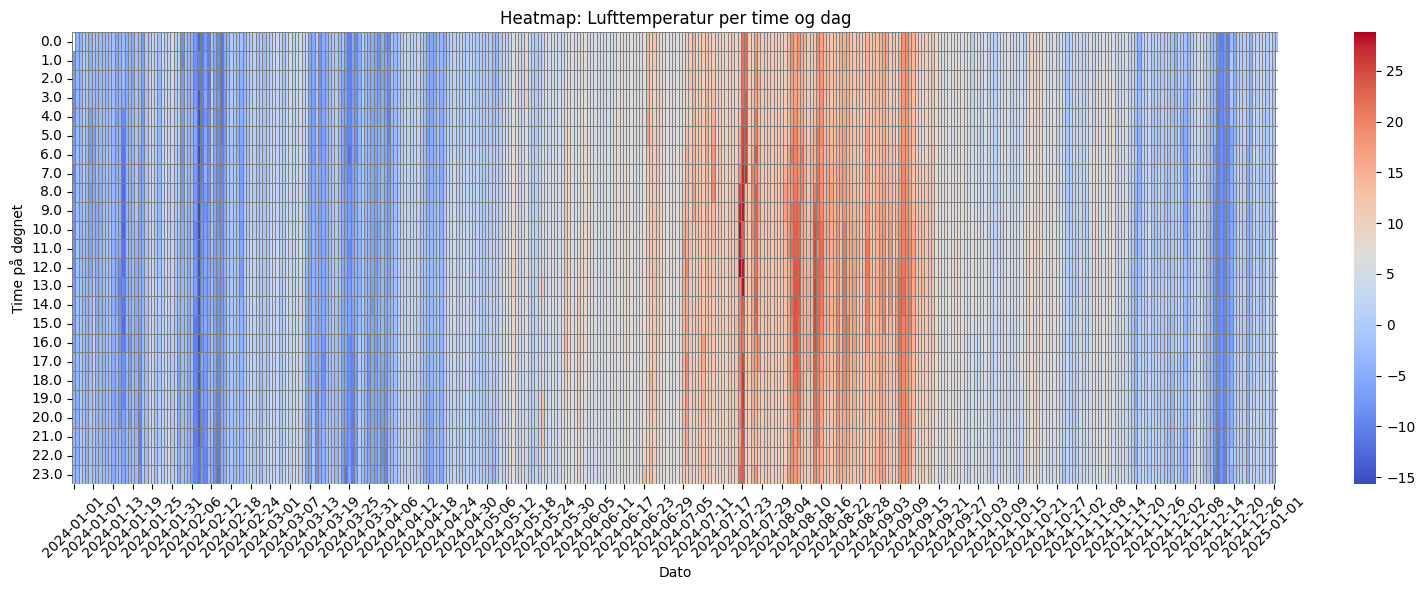

In [12]:

# Klargjøring av data for pivot-tabell
data["Dato"] = data["Tid(norsk normaltid)"].dt.date
data["Time"] = data["Tid(norsk normaltid)"].dt.hour

# Beregn gjennomsnitt per time per dag
pivot_temp = data.pivot_table(index="Time", columns="Dato", values="Lufttemperatur", aggfunc="mean")

# Plotte heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_temp, cmap="coolwarm", annot=False, linewidths=0.5, linecolor='gray')

plt.title("Heatmap: Lufttemperatur per time og dag")
plt.xlabel("Dato")
plt.ylabel("Time på døgnet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Hvordan mangel på verdier påvirker dataen